In [1049]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1050]:
loan_df = pd.read_csv('./loan.csv',sep=',' ,dtype='unicode')

In [1051]:
loan_df = loan_df.drop(['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
              'mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
             'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
              'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
             'num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
              'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
              'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
              'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','annual_inc_joint','dti_joint',
                        'verification_status_joint','tot_coll_amt','tot_cur_bal',
                       'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
                       'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
                       'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
                       'mths_since_last_major_derog','mo_sin_old_il_acct','next_pymnt_d','mths_since_last_record',
                        'mths_since_last_delinq'], axis=1)




In [1052]:
# str('20.00%').rstrip('%')
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: str(x).rstrip('%'))
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: str(x).rstrip('%'))


In [1053]:
loan_df['id'] = loan_df['id'].astype(int)
loan_df['member_id'] = loan_df['id'].astype(int)

loan_df['loan_amnt'] = loan_df['loan_amnt'].astype(float)
loan_df['funded_amnt_inv'] = loan_df['funded_amnt_inv'].astype(float)

loan_df['int_rate'] = loan_df['int_rate'].astype(float)

loan_df['installment'] = loan_df['installment'].astype(float)
loan_df['delinq_2yrs'] = loan_df['delinq_2yrs'].astype(float)
loan_df['inq_last_6mths'] = loan_df['inq_last_6mths'].astype(float)

loan_df['pub_rec'] = loan_df['pub_rec'].astype(int)
loan_df['revol_bal'] = loan_df['revol_bal'].astype(float)
loan_df['revol_util'] = loan_df['revol_util'].astype(float)
loan_df['out_prncp'] = loan_df['out_prncp'].astype(float)
loan_df['out_prncp_inv'] = loan_df['out_prncp_inv'].astype(float)

loan_df['total_pymnt'] = loan_df['total_pymnt'].astype(float)
loan_df['total_pymnt_inv'] = loan_df['total_pymnt_inv'].astype(float)
loan_df['total_rec_prncp'] = loan_df['total_rec_prncp'].astype(float)
loan_df['total_rec_int'] = loan_df['total_rec_int'].astype(float)
loan_df['total_rec_late_fee'] = loan_df['total_rec_late_fee'].astype(float)
loan_df['recoveries'] = loan_df['recoveries'].astype(float)
loan_df['collection_recovery_fee'] = loan_df['collection_recovery_fee'].astype(float)
loan_df['last_pymnt_amnt'] = loan_df['last_pymnt_amnt'].astype(float)
loan_df['collections_12_mths_ex_med'] = loan_df['collections_12_mths_ex_med'].astype(float)
loan_df['policy_code'] = loan_df['policy_code'].astype(float)

loan_df['acc_now_delinq'] = loan_df['acc_now_delinq'].astype(float)


loan_df['annual_inc'] = loan_df['annual_inc'].astype(float)
loan_df['funded_amnt'] = loan_df['funded_amnt'].astype(float)
loan_df['open_acc']=loan_df['open_acc'].astype(int)
loan_df['total_acc']=loan_df['total_acc'].astype(int)
loan_df['revol_bal'] = loan_df['revol_bal'].astype(float)
loan_df['dti'] = loan_df['dti'].astype(float)
loan_df['annual_inc'] = (loan_df.annual_inc)/1000000
loan_df['funded_amnt'] = (loan_df.funded_amnt)/1000000

In [1054]:
loan_df.drop(['id', 'member_id', 'url', 'desc', 'zip_code','acc_now_delinq','policy_code','collections_12_mths_ex_med','initial_list_status'], axis=1, inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
loan_amnt                   39717 non-null float64
funded_amnt                 39717 non-null float64
funded_amnt_inv             39717 non-null float64
term                        39717 non-null object
int_rate                    39717 non-null float64
installment                 39717 non-null float64
grade                       39717 non-null object
sub_grade                   39717 non-null object
emp_title                   37258 non-null object
emp_length                  38642 non-null object
home_ownership              39717 non-null object
annual_inc                  39717 non-null float64
verification_status         39717 non-null object
issue_d                     39717 non-null object
loan_status                 39717 non-null object
pymnt_plan                  39717 non-null object
purpose                     39717 non-null object
title                       39706 n

In [1055]:
# loan_df.info()
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
pymnt_plan                  0.00
purpose                     0.00
title                       0.03
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc                   0.00
out_prncp                   0.00
out_prncp_inv               0.00
total_pymn

In [1056]:
# loan_df.pymnt_plan.unique() this will not been usefull as only one value array(['n'], dtype=object)
#url has no insight aither then account id 
# desc is too informative but we don't know how to deal as based on NLP (text processing)
# purpose already cover above
# loan_df.title 
#zip_code no need to analysis
#addr_state

# loan_df.pub_rec.unique()
# round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
# loan_df.tax_liens.unique()
# loan_df.pub_rec_bankruptcies.median()
# loan_df.tax_liens.unique()
# loan_df[['pub_rec','tax_liens','pub_rec_bankruptcies']].corr()
# #pub_rec missing values will be replaced with 0.
loan_df['pub_rec_bankruptcies'] = np.where(loan_df['pub_rec_bankruptcies'].isnull(), 0, loan_df['pub_rec_bankruptcies'])
loan_df['tax_liens'] = np.where(loan_df['tax_liens'].isnull(), 0, loan_df['tax_liens'])

#First feature with missing values is emp_.
#I believe a good way to impute these values is with "Others"
loan_df['emp_title'] = np.where(loan_df['emp_title'].isnull(), 'Others', loan_df['emp_title'])

# earliest_cr_line is transformed to the number of days before the loan is issued
# loan_df.earliest_cr_line

loan_df['earliest_cr_line']=loan_df['earliest_cr_line'].apply(lambda x: pd.datetime.strptime(str(x), '%b-%y').strftime('%m-%Y'))
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])

loan_df['issue_d']=loan_df['issue_d'].apply(lambda x: pd.datetime.strptime(x, '%b-%y').strftime('%m-%Y'))
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])
#compare total loan amount requested each year
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month

loan_df['earliest_cr_line_in_year']=loan_df['earliest_cr_line'].dt.year

In [1057]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].astype(int)
loan_df['revol_util'] = np.where(loan_df['revol_util'].isnull(), 0, loan_df['revol_util'])

### My Finding
'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec','revol_bal','revol_util', 'total_acc', 'initial_list_status'

### Univariate Analysis

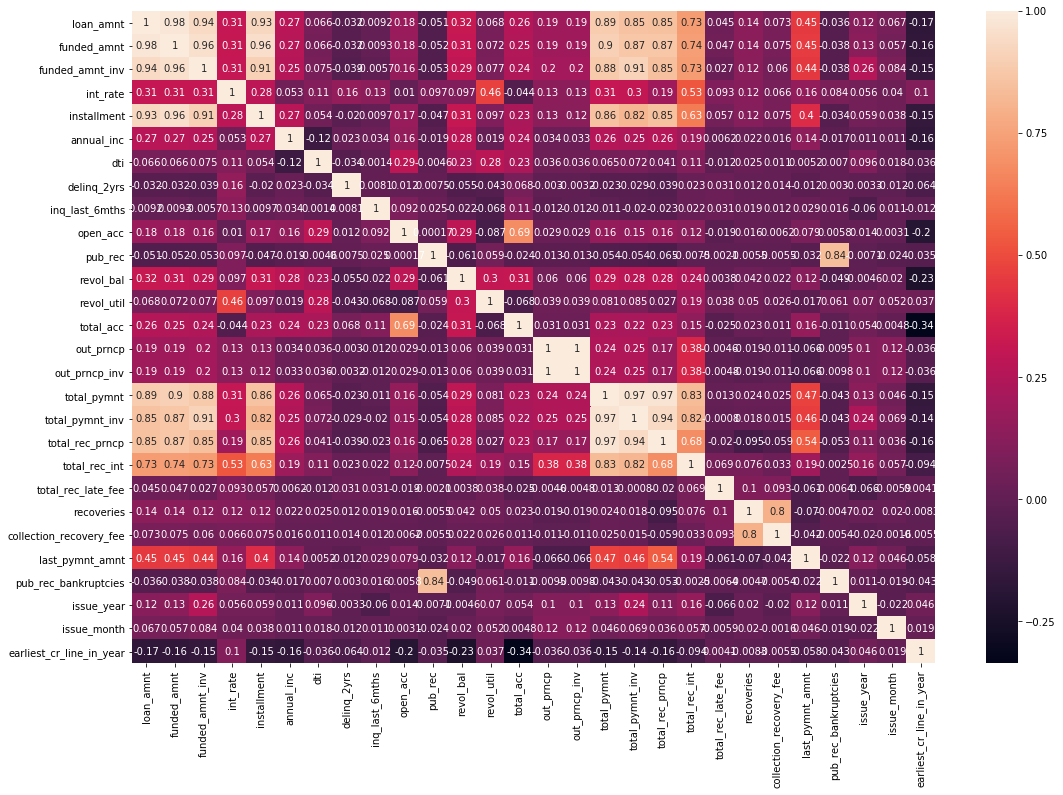

In [1087]:
# loan_df.installment
plt.figure(figsize=(18, 12))

# heatmap with a color map of choice
# sns.heatmap(,cmap="YlGnBu")


sns.heatmap(loan_df.corr(), 
            xticklabels = loan_df.corr().columns.values,
            yticklabels = loan_df.corr().columns.values,
            annot = True);
plt.show()

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


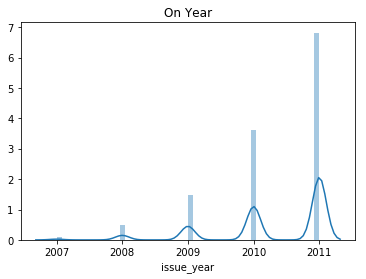

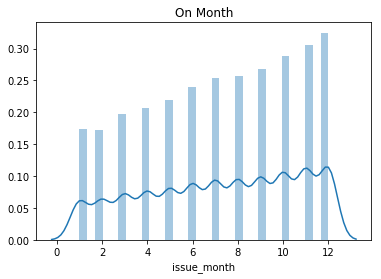

In [1059]:
#'issue_d', 'loan_status','purpose',title','addr_state', 'dti', 'delinq_2yrs',
#'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec','revol_bal','revol_util', 'total_acc', 'initial_list_status'

plt.title('On Year')
sns.distplot(loan_df.issue_year)
plt.show()

plt.title('On Month')
sns.distplot(loan_df.issue_month)
plt.show()

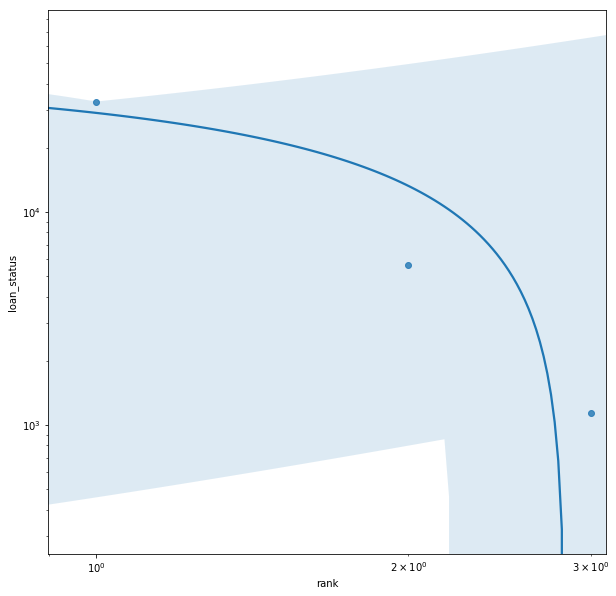

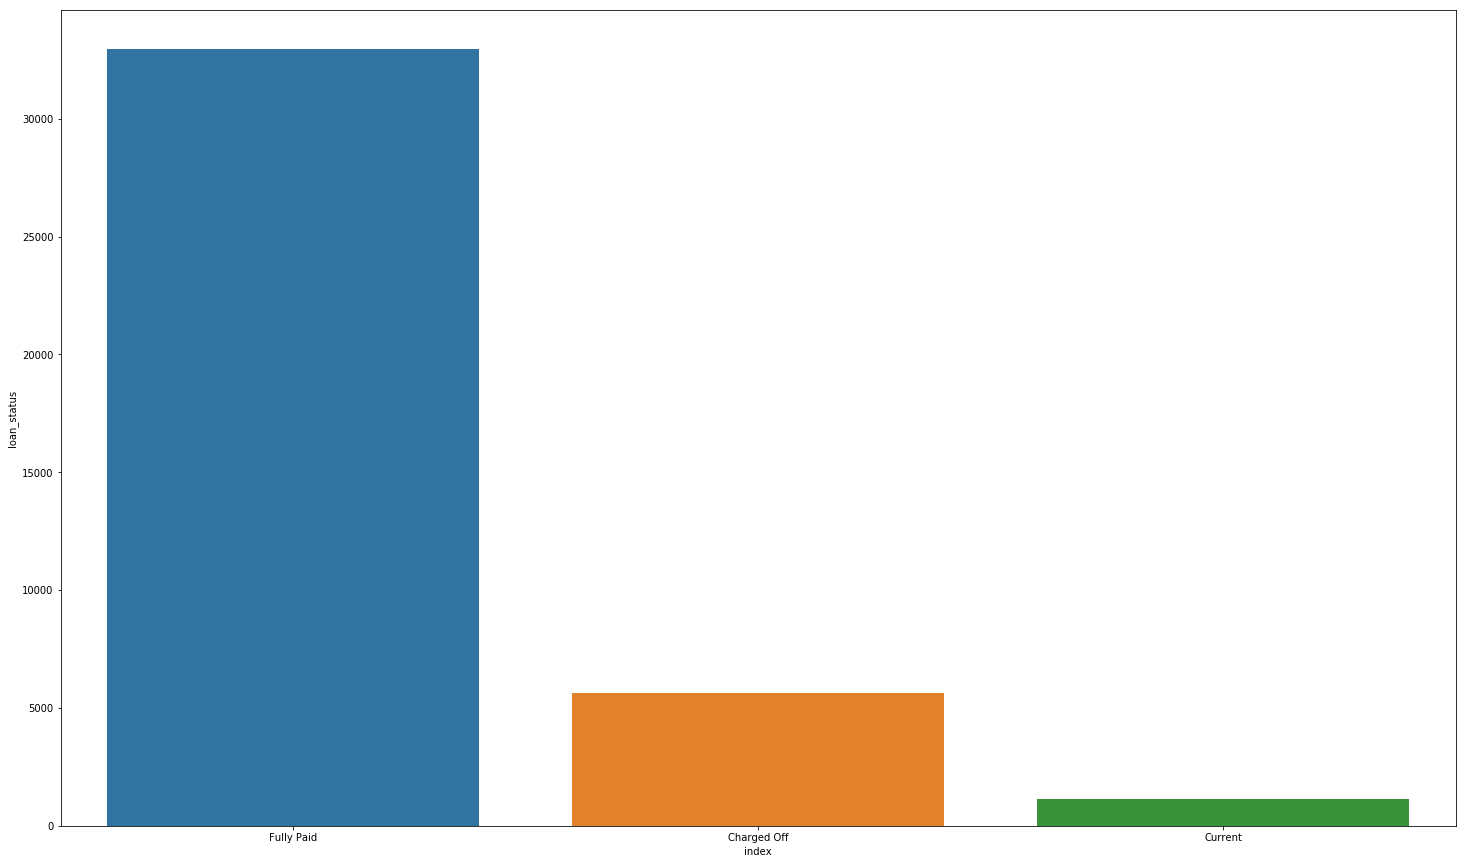

In [1060]:
#Power Low distribution for loan_status unOrder Categorical

loan_status_reg = pd.DataFrame(loan_df['loan_status'].value_counts())
loan_status_reg = loan_status_reg.reset_index()
loan_status_reg['rank'] = range(1, len(loan_status_reg) + 1)
loan_status_reg.head()
plt.figure(figsize=(10, 10))
sns.regplot(x=loan_status_reg['rank'], y=loan_status_reg['loan_status'], data=loan_status_reg)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='loan_status', data=loan_status_reg)
plt.show()


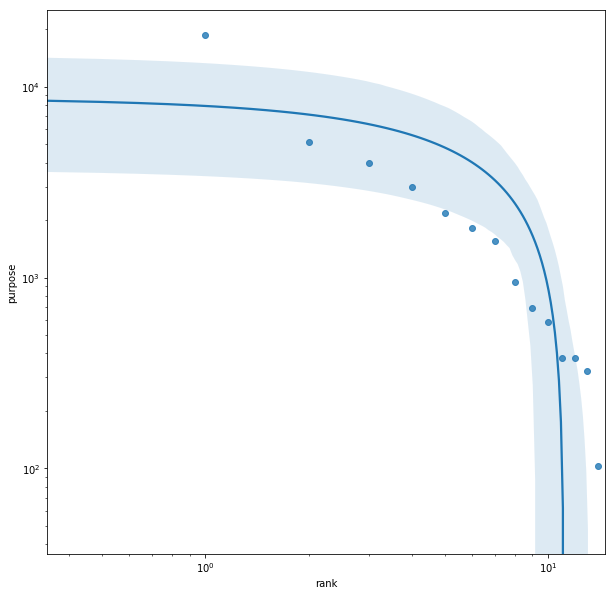

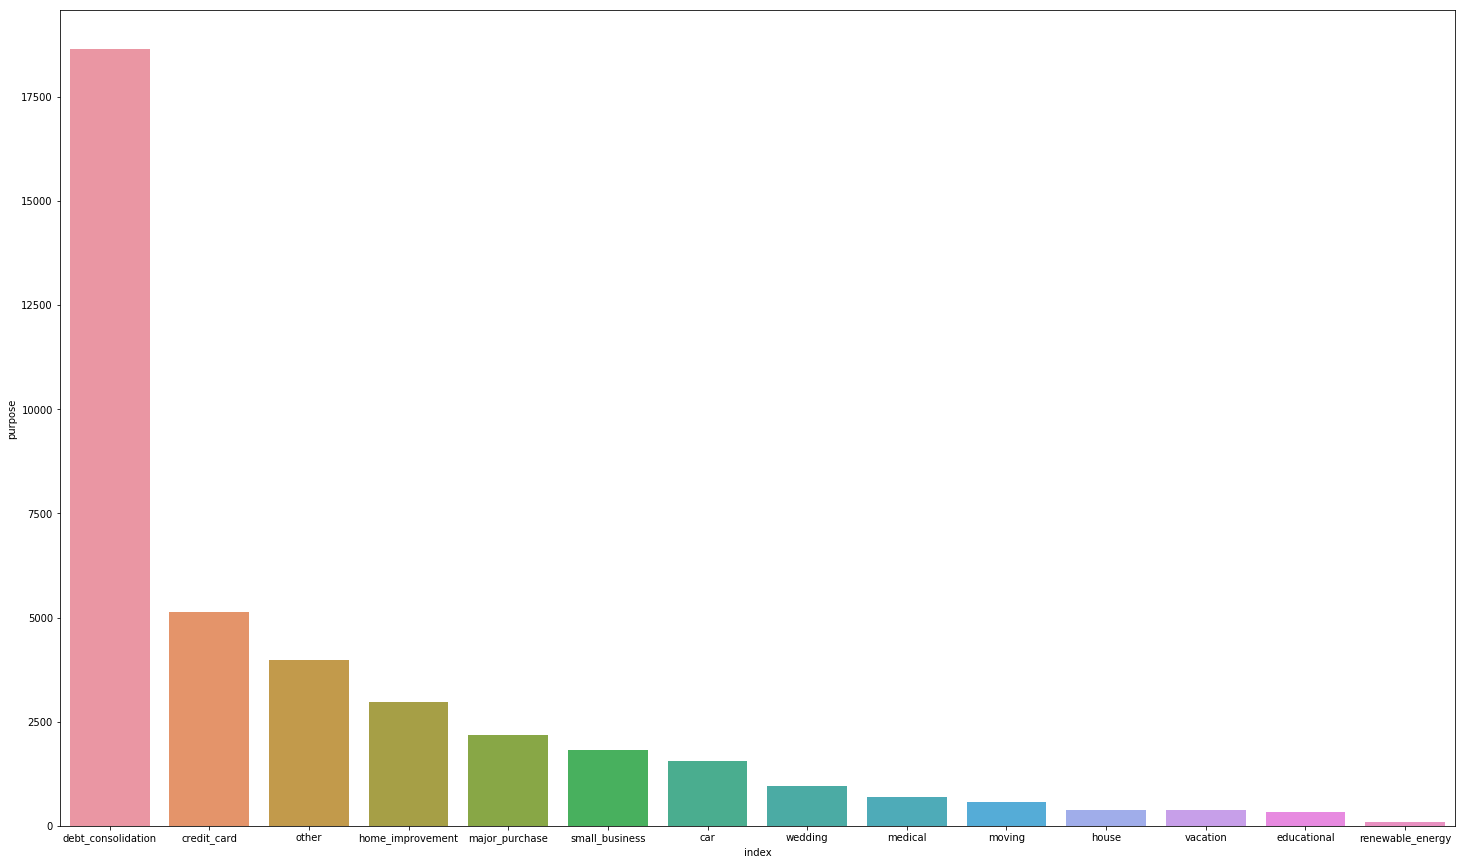

In [1061]:
#Power Low distribution for purpose unOrder Categorical

purpose_reg = pd.DataFrame(loan_df['purpose'].value_counts())
purpose_reg = purpose_reg.reset_index()
purpose_reg['rank'] = range(1, len(purpose_reg) + 1)
plt.figure(figsize=(10, 10))
sns.regplot(x=purpose_reg['rank'], y=purpose_reg['purpose'], data=purpose_reg)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='purpose', data=purpose_reg)
plt.show()
# purpose_reg.head()

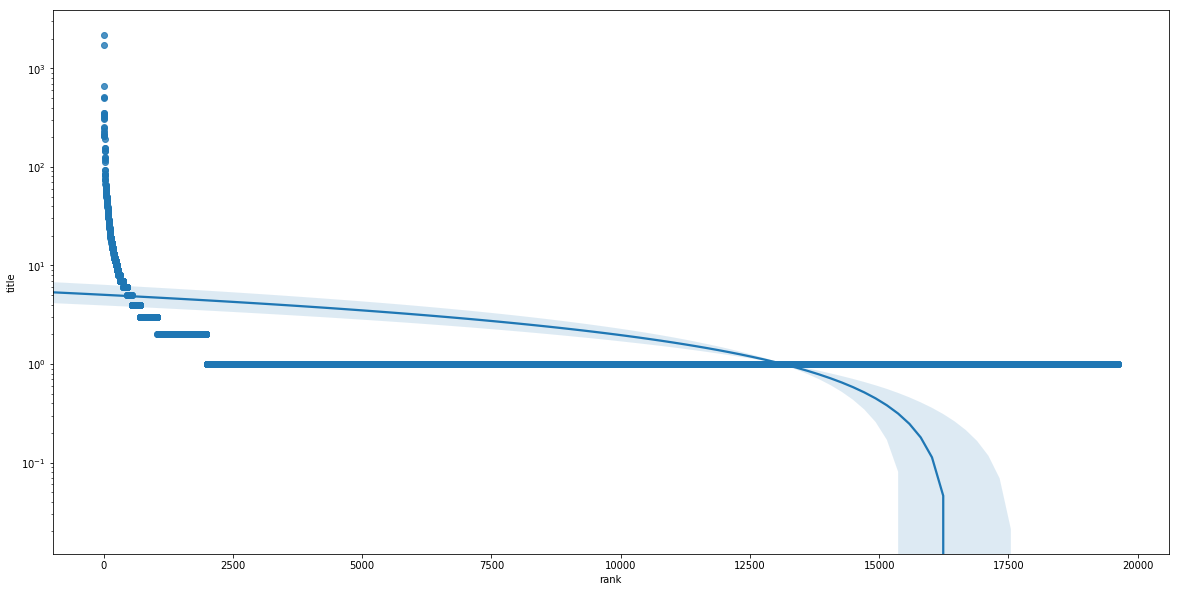

In [1062]:
#Power law distribution for title 
title_reg = pd.DataFrame(loan_df['title'].value_counts())
title_reg = title_reg.reset_index()
title_reg['rank'] = range(1, len(title_reg) + 1)
plt.figure(figsize=(20, 10))
sns.regplot(x=title_reg['rank'], y=title_reg['title'], data=title_reg)
plt.yscale('log')
# plt.xscale('log')
plt.show()



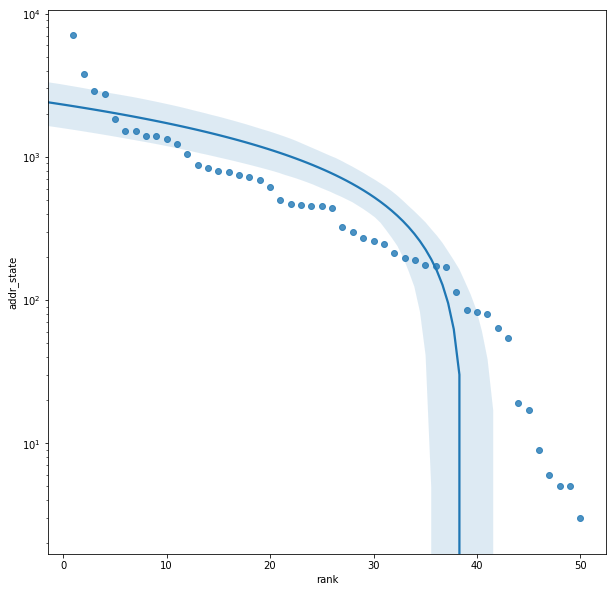

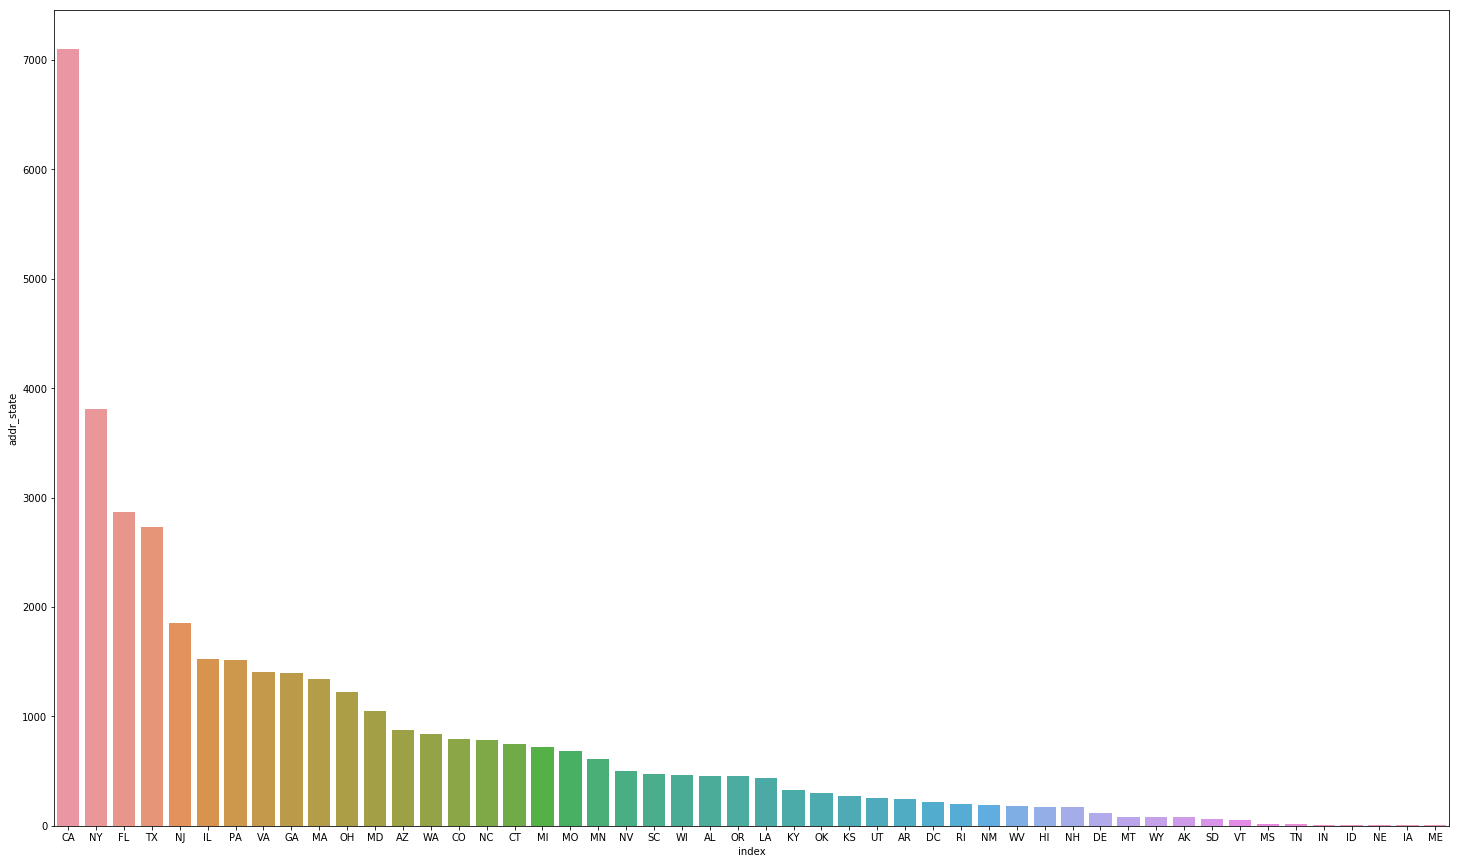

In [1063]:
#Power Low distribution for purpose unOrder Categorical

address_reg = pd.DataFrame(loan_df['addr_state'].value_counts())
address_reg = address_reg.reset_index()
address_reg['rank'] = range(1, len(address_reg) + 1)
plt.figure(figsize=(10, 10))
sns.regplot(x=address_reg['rank'], y=address_reg['addr_state'], data=address_reg)
plt.yscale('log')
# plt.xscale('log')
plt.show()

plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='addr_state', data=address_reg)
plt.show()

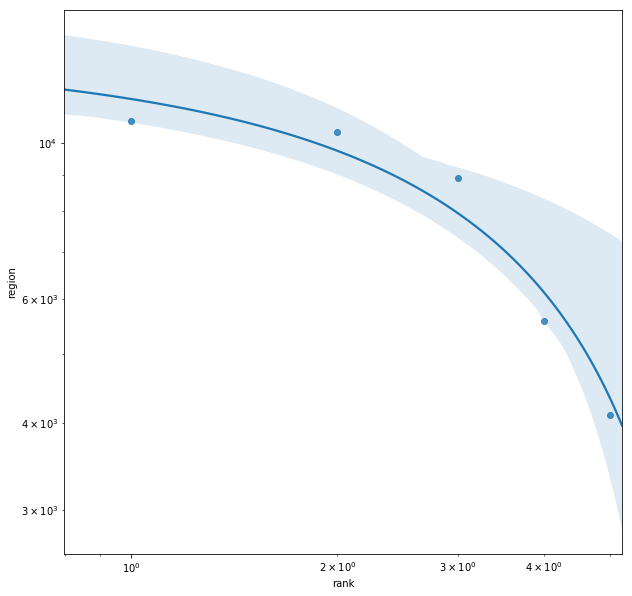

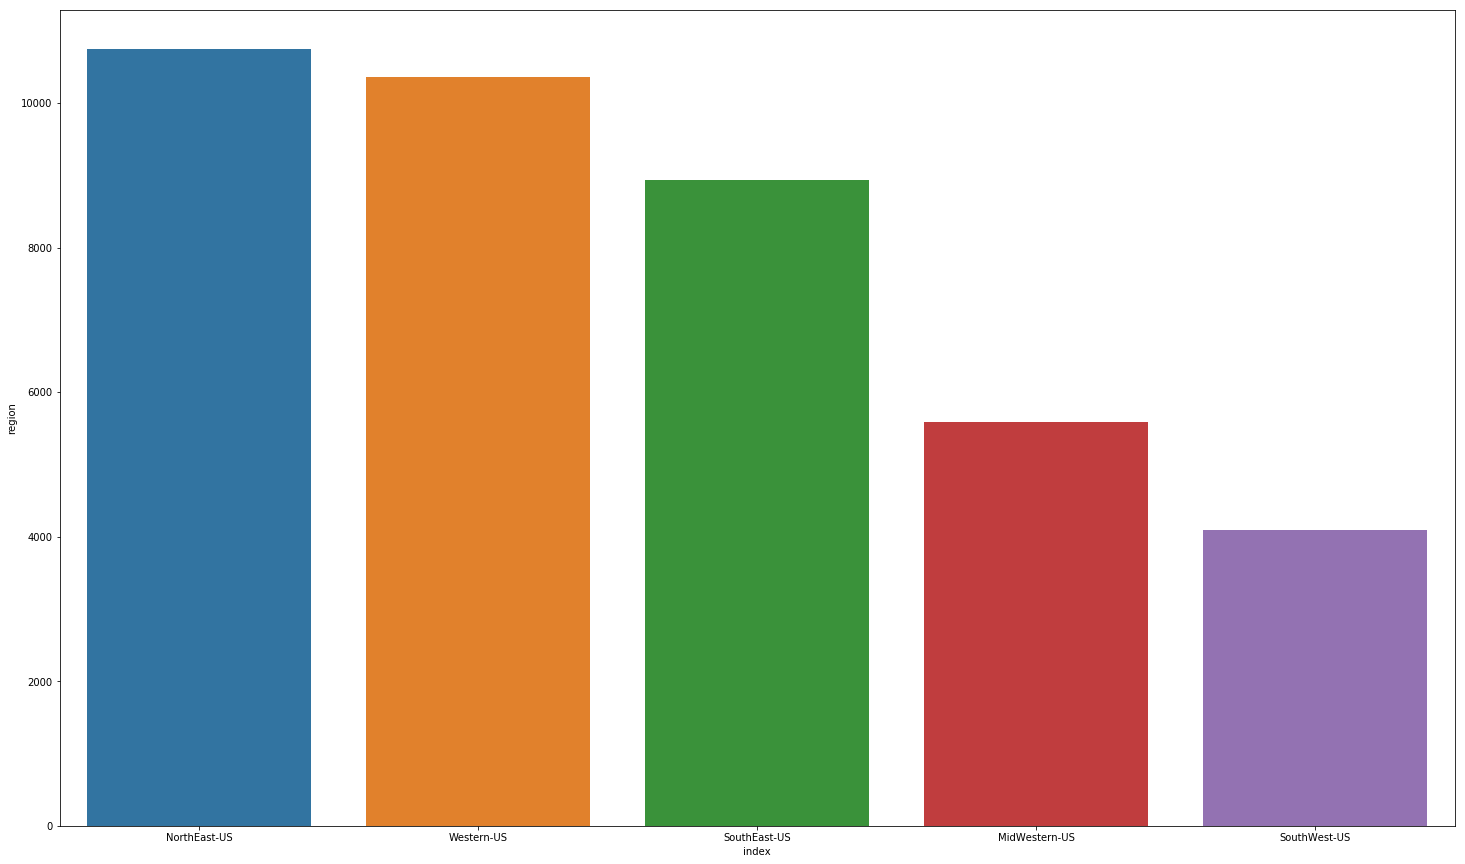

In [1064]:
western_us = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west_us = ['AZ', 'TX', 'NM', 'OK']
south_east_us = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_western_us = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east_us = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

loan_df['region'] = np.nan
def finding_regions(state):
    if state in western_us:
        return 'Western-US'
    elif state in south_west_us:
        return 'SouthWest-US'
    elif state in south_east_us:
        return 'SouthEast-US'
    elif state in mid_western_us:
        return 'MidWestern-US'
    elif state in north_east_us:
        return 'NorthEast-US'
    
loan_df['region'] = loan_df['addr_state'].apply(finding_regions)


region_reg = pd.DataFrame(loan_df['region'].value_counts())
region_reg = region_reg.reset_index()
region_reg['rank'] = range(1, len(region_reg) + 1)
plt.figure(figsize=(10, 10))
sns.regplot(x=region_reg['rank'], y=region_reg['region'], data=region_reg)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='region', data=region_reg)
plt.show()

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


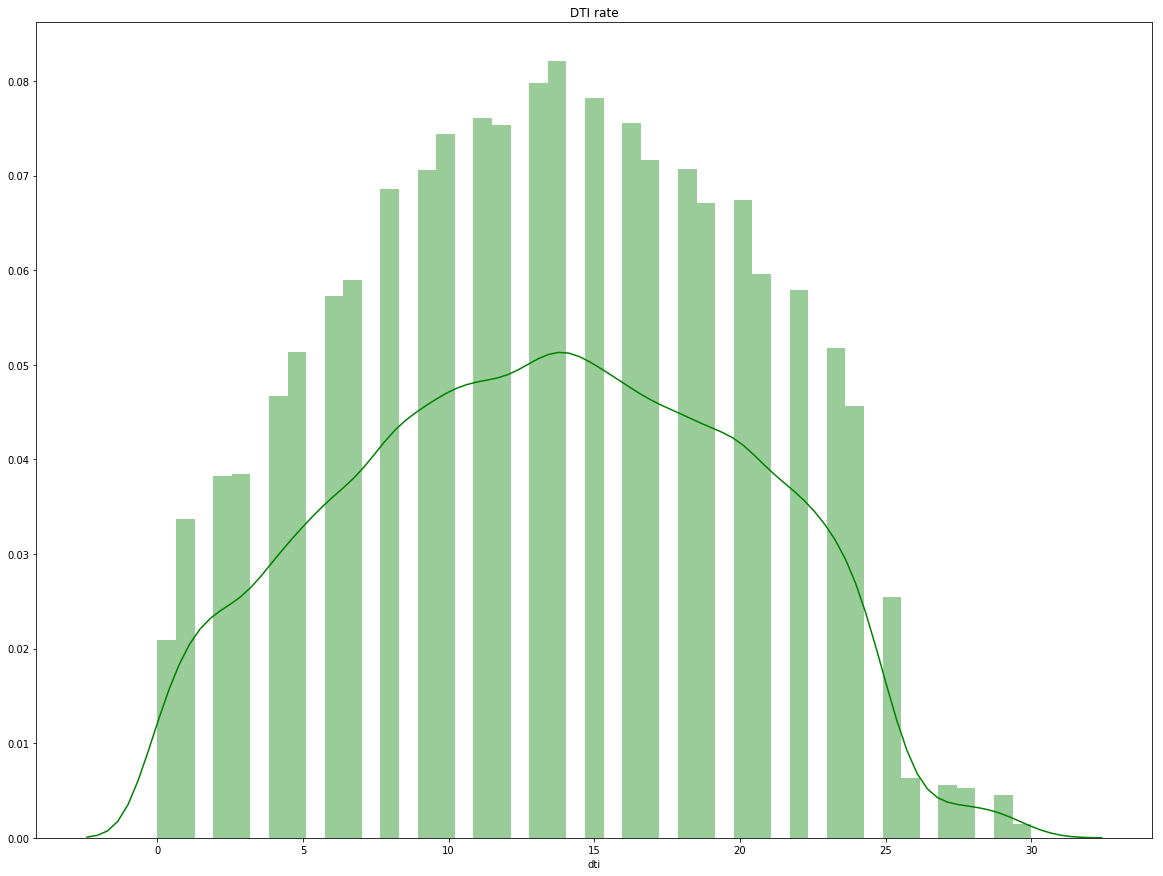

In [1065]:
# Histogram dti rate variable distribution (Debt-to-income ratio (DTI for short) is a simple calculation 
#banks and other financial companies use to see if you are going to be able to pay back their loan. 
#It’s the amount of your monthly debt obligations divided by your monthly income.)
# to get loan you should excellent credit and an extremely low debt to income ratio.

plt.figure(figsize=(20, 15))
plt.title('DTI rate')
sns.distplot(loan_df.dti.round(), color="g")
plt.show()


c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


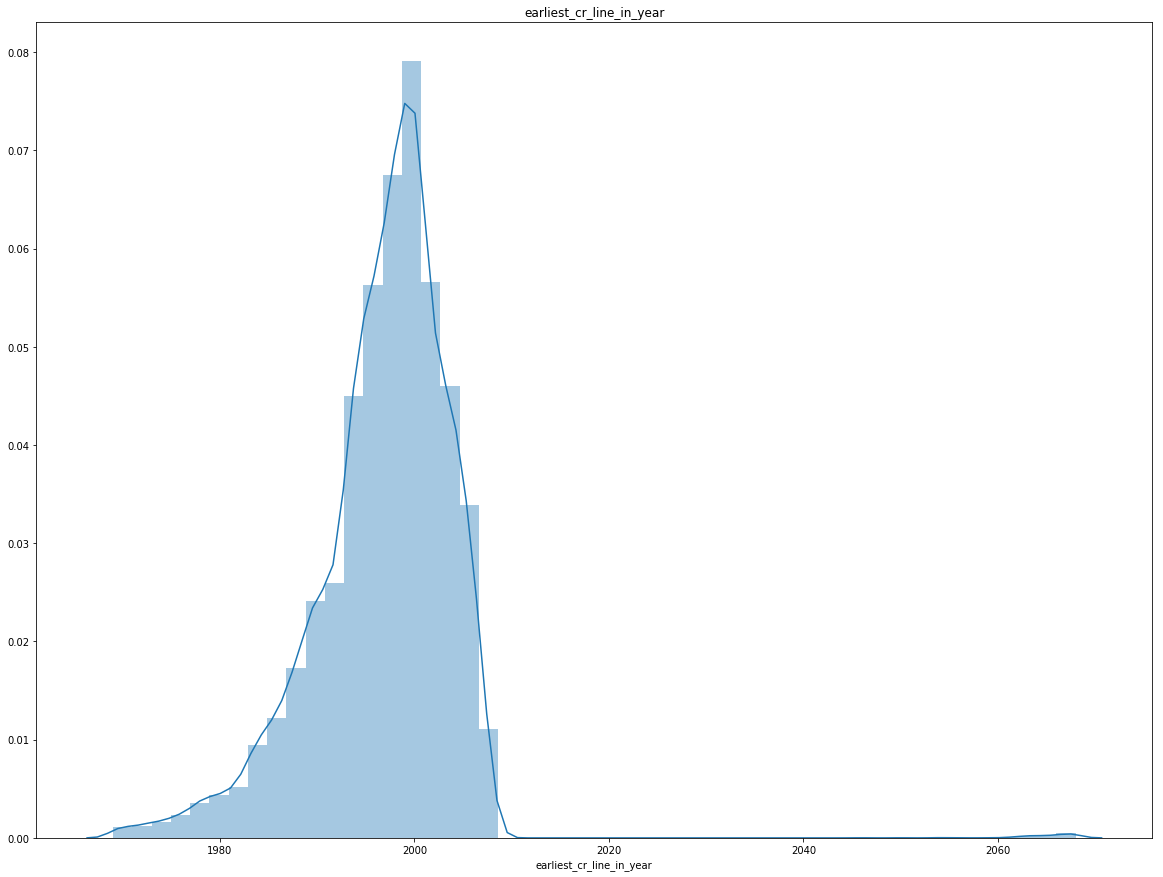

In [1066]:
plt.figure(figsize=(20, 15))
plt.title('earliest_cr_line_in_year')
sns.distplot(loan_df.earliest_cr_line_in_year)
plt.show()

Median:  20.0
-----------------------------------
count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


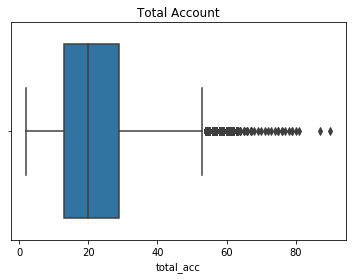

------------------------------------
Median:  9.0
-----------------------------------
count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


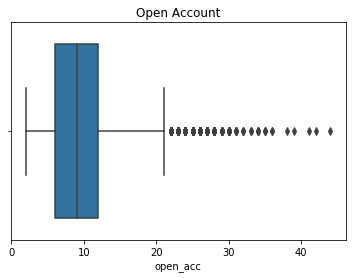

In [1067]:
print('Median: ', loan_df.total_acc.median())
print('-----------------------------------')
print(loan_df.total_acc.round().describe()) 

sns.boxplot(x=loan_df['total_acc'])
plt.title('Total Account')
plt.show()

print('------------------------------------')

print('Median: ', loan_df.open_acc.median())
print('-----------------------------------')
print(loan_df.open_acc.round().describe()) 

sns.boxplot(x=loan_df['open_acc'])
plt.title('Open Account')
plt.show()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64
Median  0.0
----------------------------
0    38036
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64
Median  0.0


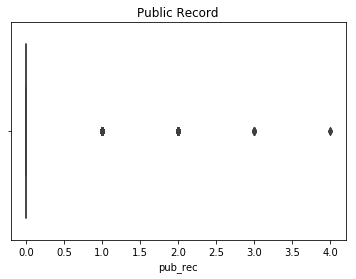

In [1068]:
print(loan_df.pub_rec.value_counts())
print('Median ',loan_df.pub_rec.median())
print('----------------------------')
print(loan_df.pub_rec_bankruptcies.value_counts())
print('Median ',loan_df.pub_rec_bankruptcies.median())

sns.boxplot(x=loan_df['pub_rec'])
plt.title('Public Record')
plt.show()


c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


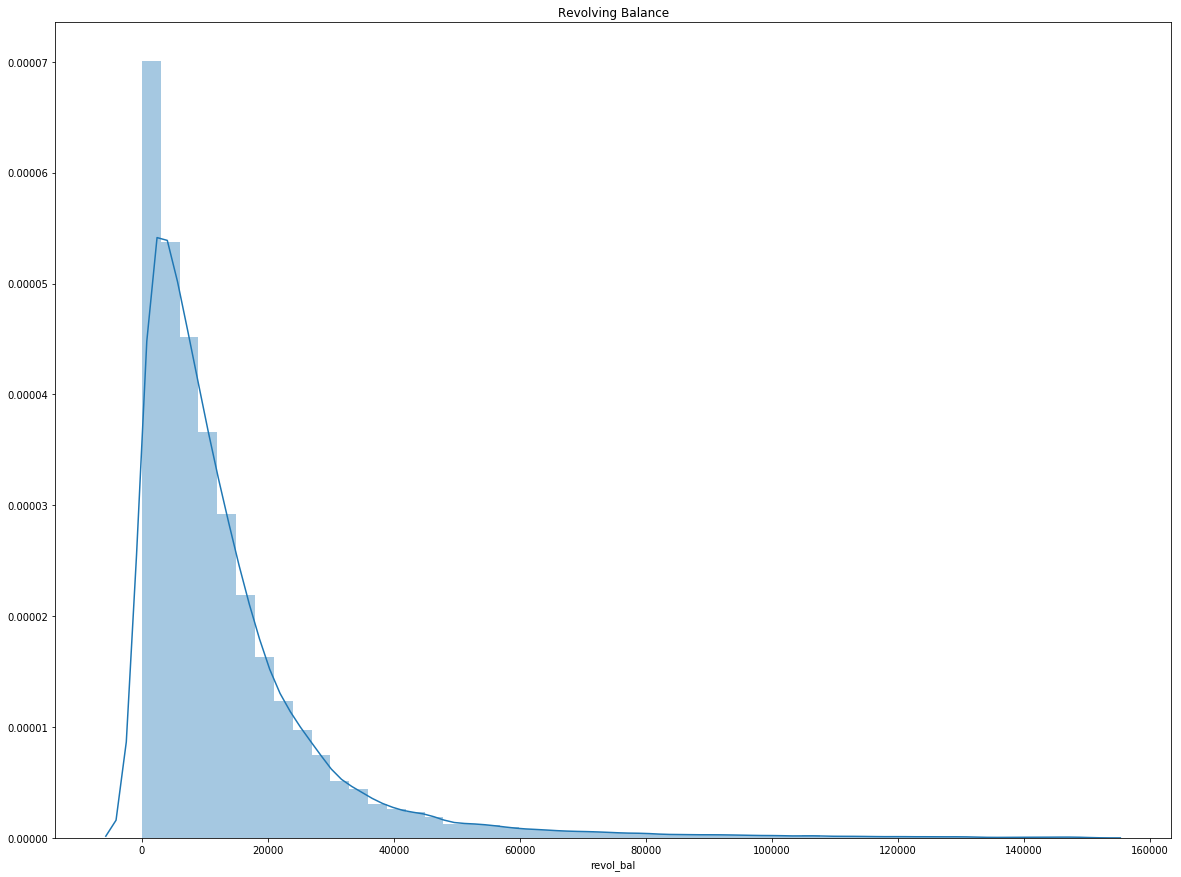

In [1069]:
#Total credit revolving balance (In credit card terms, a revolving balance is the portion of credit 
#card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down 
#depending on the amount borrowed and the amount repaid. ... When the balance is paid off, the customer is no 
#longer revolving the debt.) more revolving bal higher risk of charged off

plt.figure(figsize=(20, 15))
plt.title('Revolving Balance')
sns.distplot(loan_df.revol_bal)
plt.show()

#ok

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


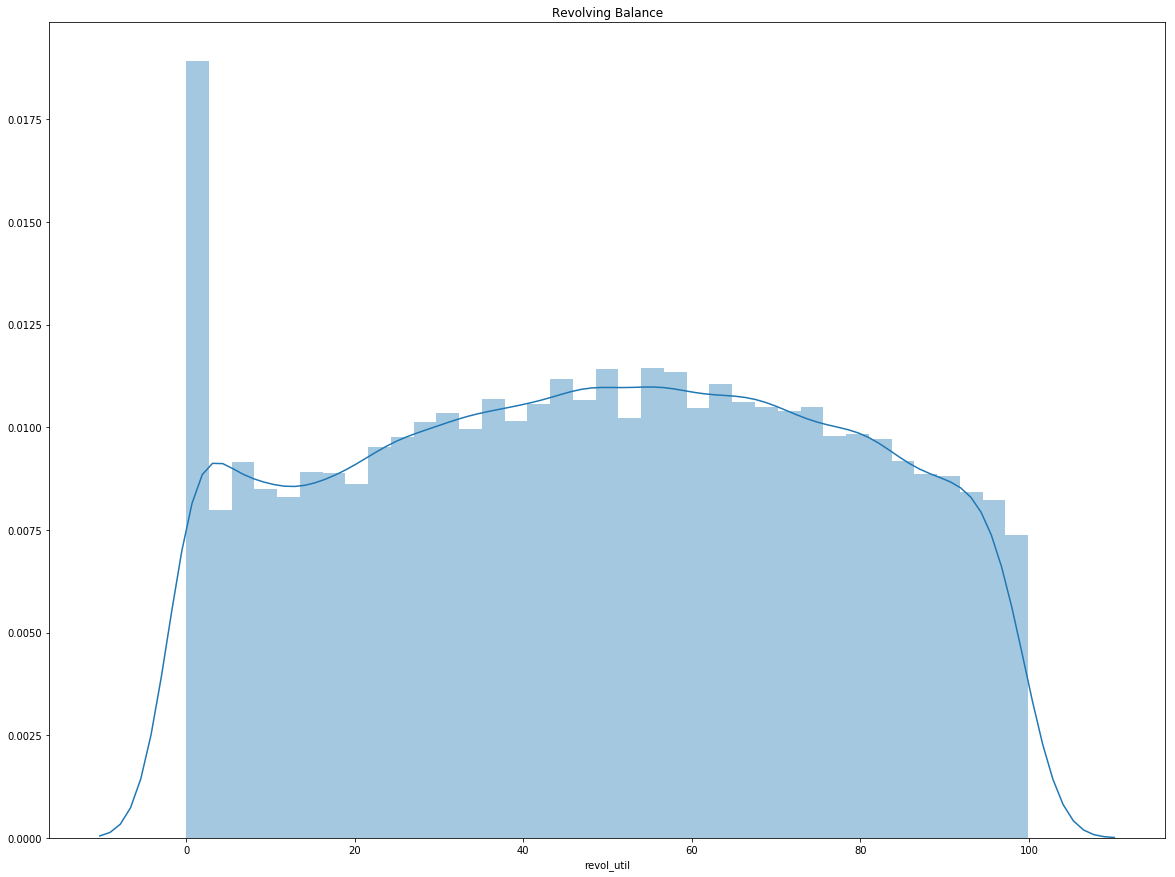

In [1070]:
plt.figure(figsize=(20, 15))
plt.title('Revolving Balance')
sns.distplot(loan_df.revol_util)
plt.show()

### Segmented Analysis

For Risk analysis we need to define the No Risk loan and moderate risk loan, as we know in loan_status analysis we have 3 type of loan 1. Full Paid, 2. Current, 3. Charged Off, Charged Off loan can have moderate Risk, so for this I am going to evaluate the loan_status with dti.

               count       mean       std  min    25%    50%     75%    max
loan_status                                                                
Charged Off   5627.0  14.000624  6.585577  0.0  9.050  14.29  19.290  29.85
Current       1140.0  14.750009  6.710482  0.0  9.745  15.05  20.045  29.95
Fully Paid   32950.0  13.148421  6.680041  0.0  7.980  13.20  18.390  29.99


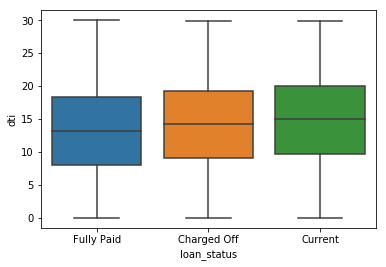

In [1076]:
print(loan_df.groupby('loan_status')['dti'].describe())

sns.boxplot(x='loan_status', y='dti', data=loan_df)
plt.show()

In [1106]:
#create two type of loan No-Risk and Moderate-Risk, As we can see only 1140 is Current loan and the 
#50% qurtile dti ratio is more then 15%, assuption is more dti rate more risk on loan, I can add current and 
#charged-Off as on Moderate-Rsik
#As Current status can be go to charged off this is risk factor.

Moderate_Risk = ["Charged Off", "Current"]

def loan_risk(status):
    if status in Moderate_Risk:
        return 'Moderate-risk'
    else:
        return 'No-Risk'
        
loan_df['loan_risk'] = loan_df['loan_status'].apply(loan_risk)

[Text(0,0.5,'(%)')]

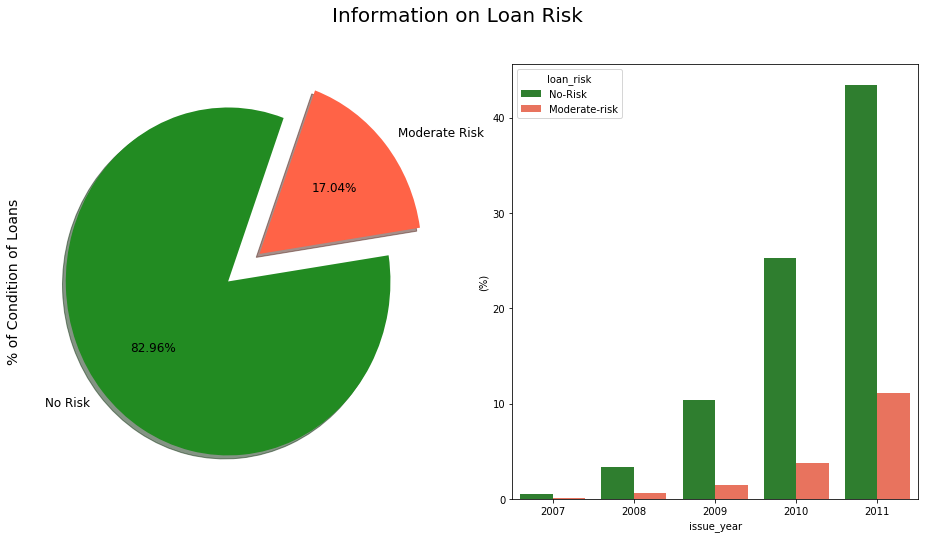

In [1107]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]
labels ="No Risk", "Moderate Risk"

plt.suptitle('Information on Loan Risk', fontsize=20)

loan_df["loan_risk"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#228B22", "#FF6347"]
sns.barplot(x="issue_year", y="loan_amnt", hue="loan_risk", data=loan_df, palette=palette, estimator=lambda x: len(x) / len(loan_df) * 100)
ax[1].set(ylabel="(%)")

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


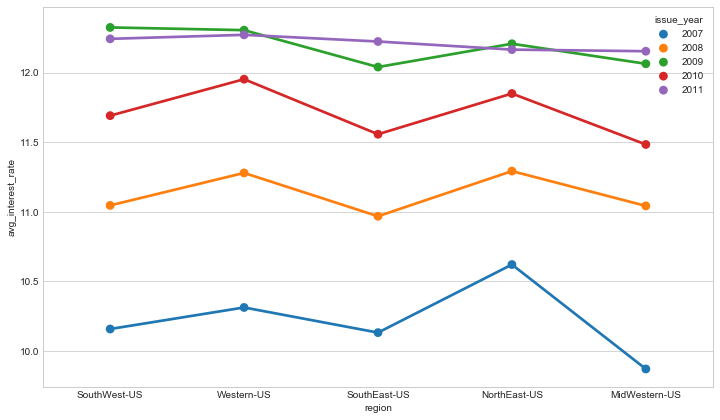

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


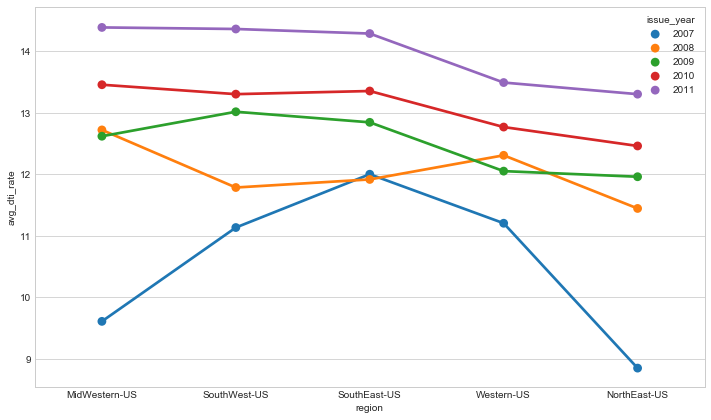

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


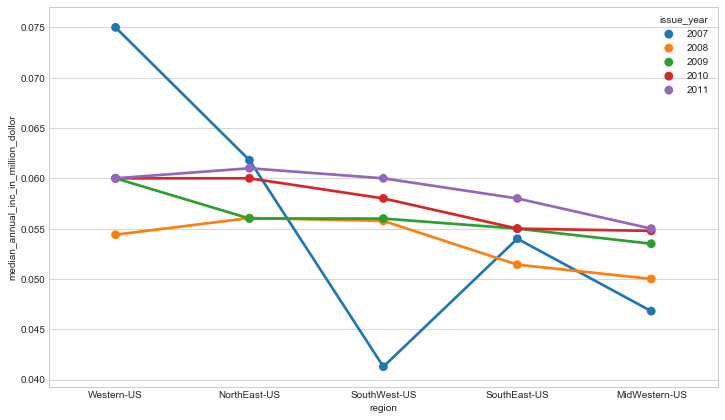

In [1151]:
#Loan issue by Region based analysis

# loan_df.groupby(['issue_year', 'region']).int_rate.mean()
plt.figure(figsize=(12, 7))

region_wise_int_avg = loan_df.groupby(['issue_year','region'])['int_rate'].agg({'avg_interest_rate':'mean'})
region_wise_int_avg = region_wise_int_avg.sort_values('avg_interest_rate', ascending=False)
region_wise_int_avg.columns.name = None
region_wise_int_avg = region_wise_int_avg.reset_index()
region_wise_int_avg

sns.pointplot(x = region_wise_int_avg.region ,
              y = region_wise_int_avg.avg_interest_rate , 
              hue = region_wise_int_avg.issue_year)

plt.show()

plt.figure(figsize=(12, 7))
region_wise_dti_avg = loan_df.groupby(['issue_year','region'])['dti'].agg({'avg_dti_rate':'mean'})
region_wise_dti_avg = region_wise_dti_avg.sort_values('avg_dti_rate', ascending=False)
region_wise_dti_avg.columns.name = None
region_wise_dti_avg = region_wise_dti_avg.reset_index()
region_wise_dti_avg

sns.pointplot(x = region_wise_dti_avg.region ,
              y = region_wise_dti_avg.avg_dti_rate , 
              hue = region_wise_dti_avg.issue_year)

plt.show()

plt.figure(figsize=(12, 7))
region_wise_annual_inc = loan_df.groupby(['issue_year','region'])['annual_inc'].agg({'median_annual_inc_in_million_dollor':'median'})
region_wise_annual_inc = region_wise_annual_inc.sort_values('median_annual_inc_in_million_dollor', ascending=False)
region_wise_annual_inc.columns.name = None
region_wise_annual_inc = region_wise_annual_inc.reset_index()
region_wise_annual_inc

sns.pointplot(x = region_wise_annual_inc.region ,
              y = region_wise_annual_inc.median_annual_inc_in_million_dollor , 
              hue = region_wise_annual_inc.issue_year)

plt.show()



               count          mean          std     min      25%      50%  \
loan_status                                                                 
Charged Off   5627.0  12104.385108  8085.732038   900.0   5600.0  10000.0   
Current       1140.0  17053.991228  8651.052316  1000.0  12000.0  15825.0   
Fully Paid   32950.0  10866.455994  7199.629493   500.0   5200.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16500.0  35000.0  
Current      23000.0  35000.0  
Fully Paid   15000.0  35000.0  


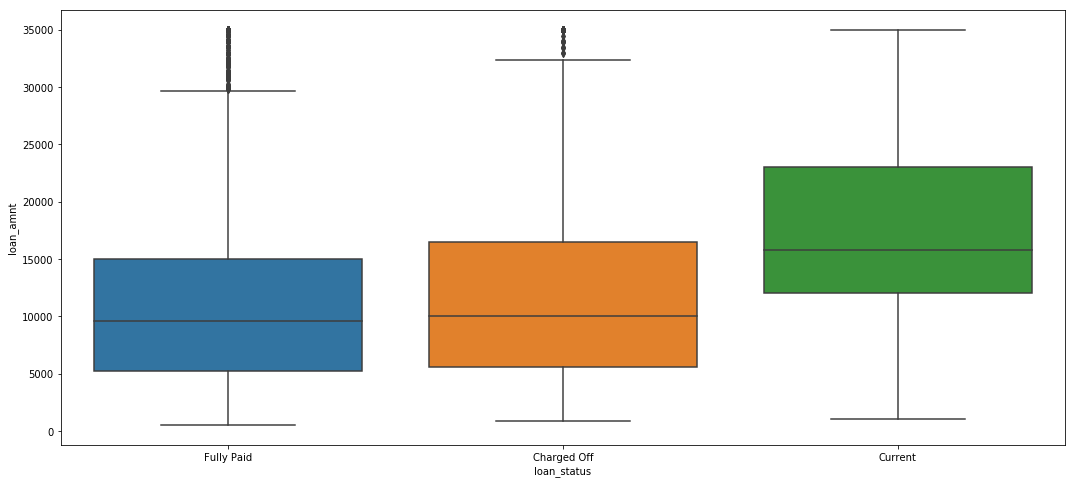

In [1082]:
loan_amnt_stat = pd.DataFrame(loan_df.groupby(['loan_status'])['loan_amnt'].describe())
print(loan_amnt_stat)

plt.figure(figsize=(18, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)
plt.show()

In [595]:
loan_amnt_with_total_observation = pd.DataFrame(loan_df.groupby(['grade'])['annual_inc'].sum())
loan_amnt_with_total_observation = loan_amnt_with_total_observation.reset_index()

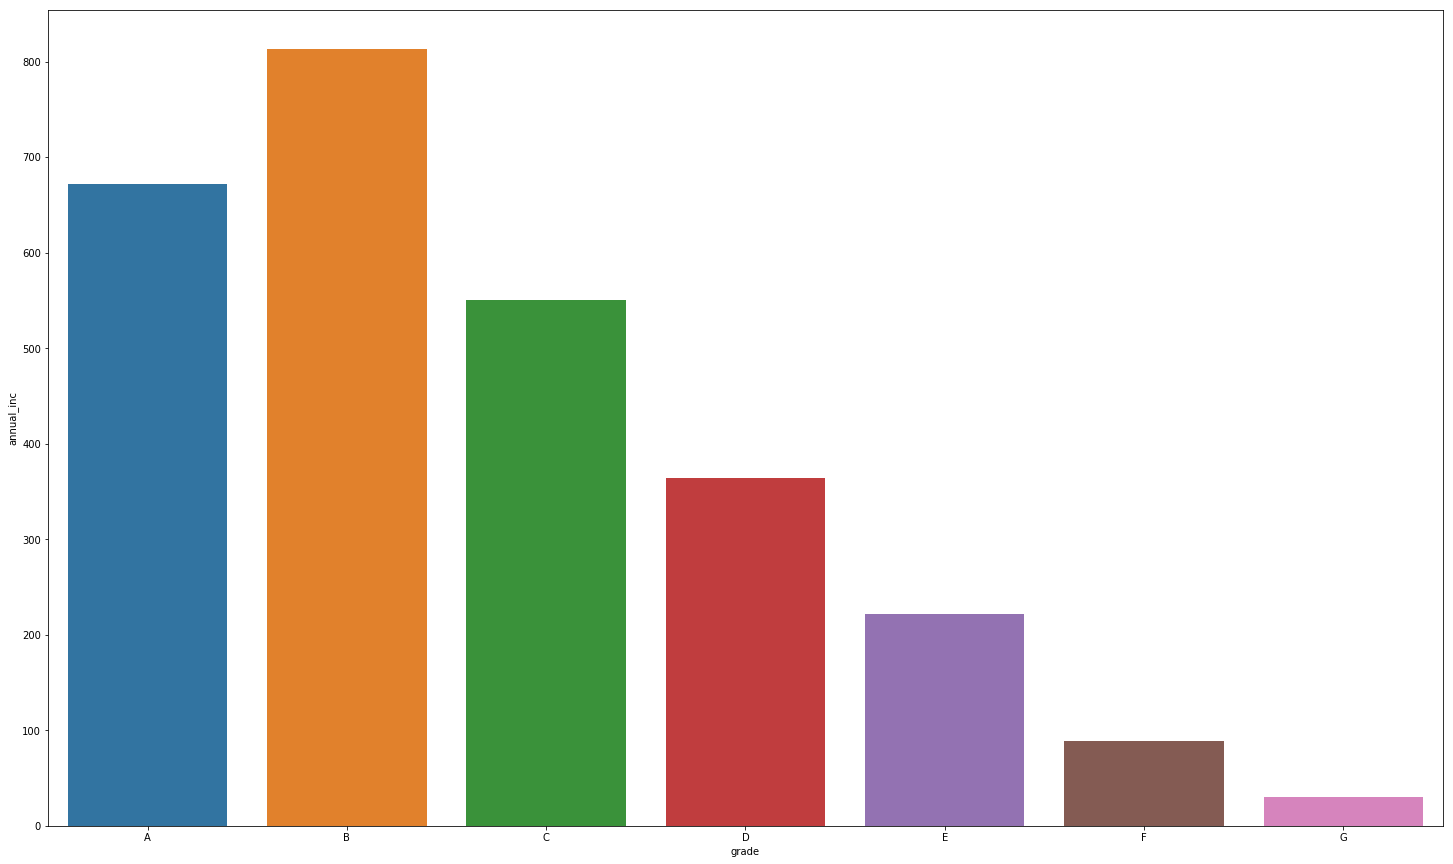

In [596]:
plt.figure(figsize=(25, 15))
sns.barplot(x='grade', y='annual_inc', data=loan_amnt_with_total_observation)
plt.show()

In [597]:
loan_amnt_with_total_observation = pd.DataFrame(loan_df.groupby(['purpose','loan_status'])['loan_amnt'].sum())
loan_amnt_with_total_observation = loan_amnt_with_total_observation.reset_index()

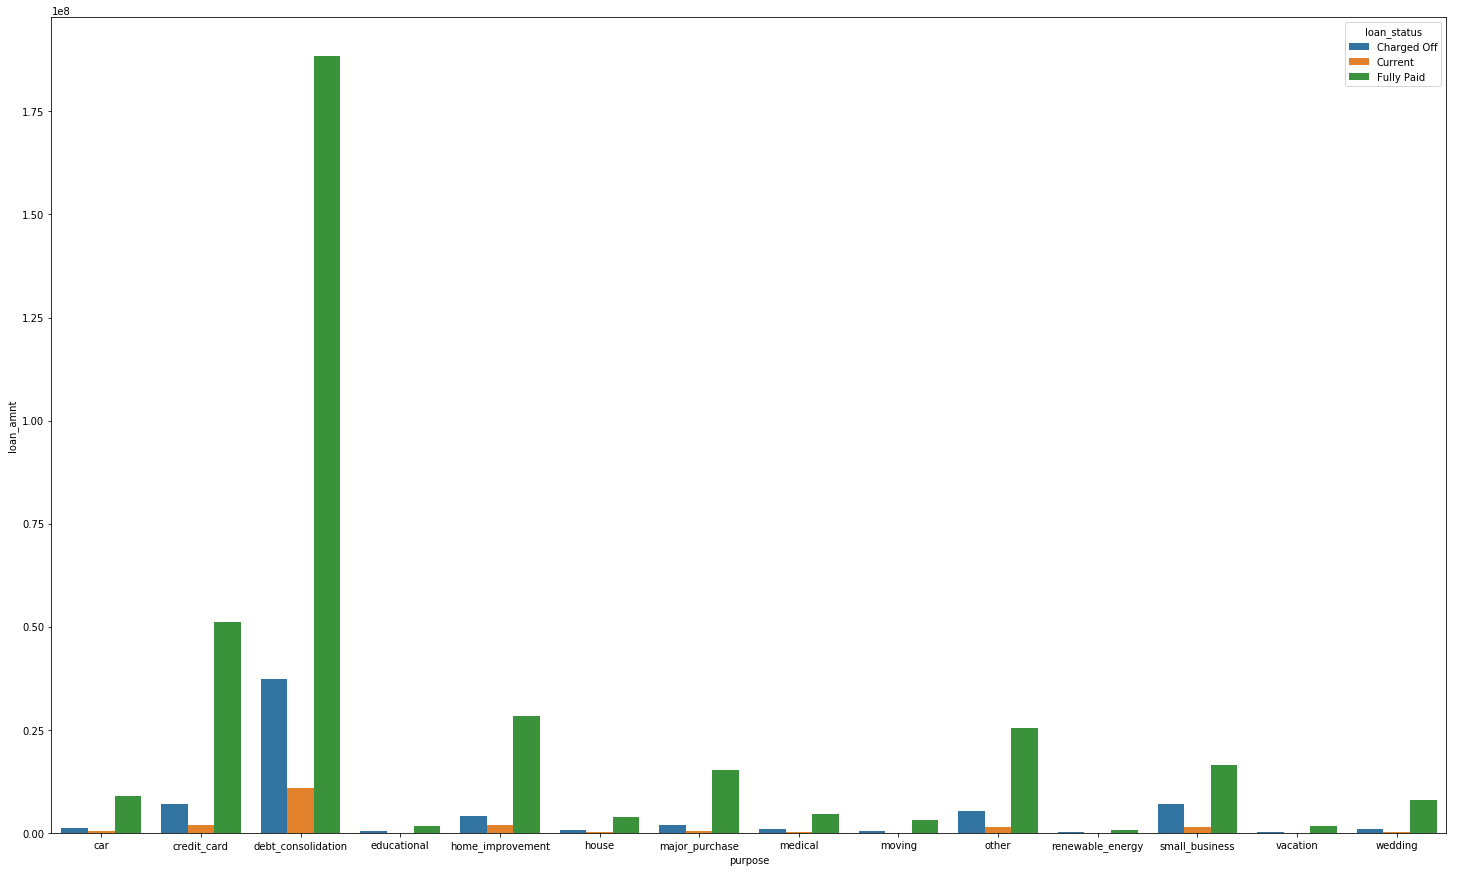

In [598]:
plt.figure(figsize=(25, 15))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=loan_amnt_with_total_observation)
plt.show()

In [599]:
loan_df['annual_inc'].corr(loan_df['funded_amnt'])

0.2669651802514584

In [600]:
loan_df['annual_inc'].describe()

count    39717.000000
mean         0.068969
std          0.063794
min          0.004000
25%          0.040404
50%          0.059000
75%          0.082300
max          6.000000
Name: annual_inc, dtype: float64

In [601]:
loan_df['annual_inc'].median()

0.059

In [602]:
loan_df['funded_amnt'].describe()

count    39717.000000
mean         0.010948
std          0.007187
min          0.000500
25%          0.005400
50%          0.009600
75%          0.015000
max          0.035000
Name: funded_amnt, dtype: float64

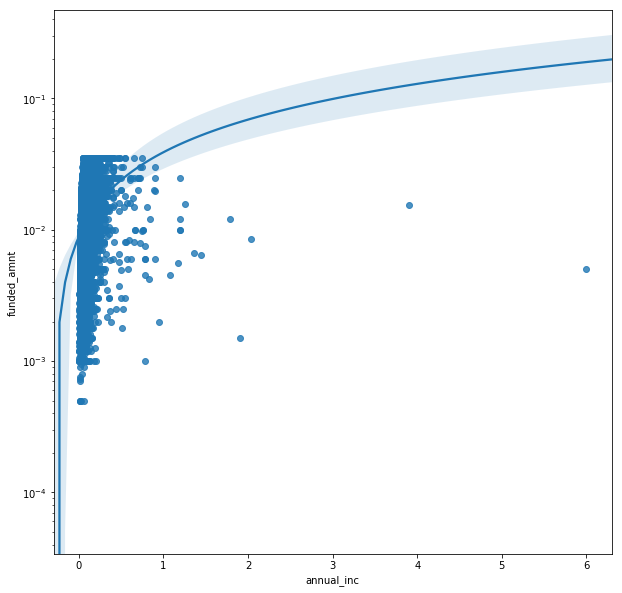

In [603]:
plt.figure(figsize=(10, 10))
sns.regplot(x='annual_inc', y='funded_amnt', data=loan_df)
plt.yscale('log')
plt.show()

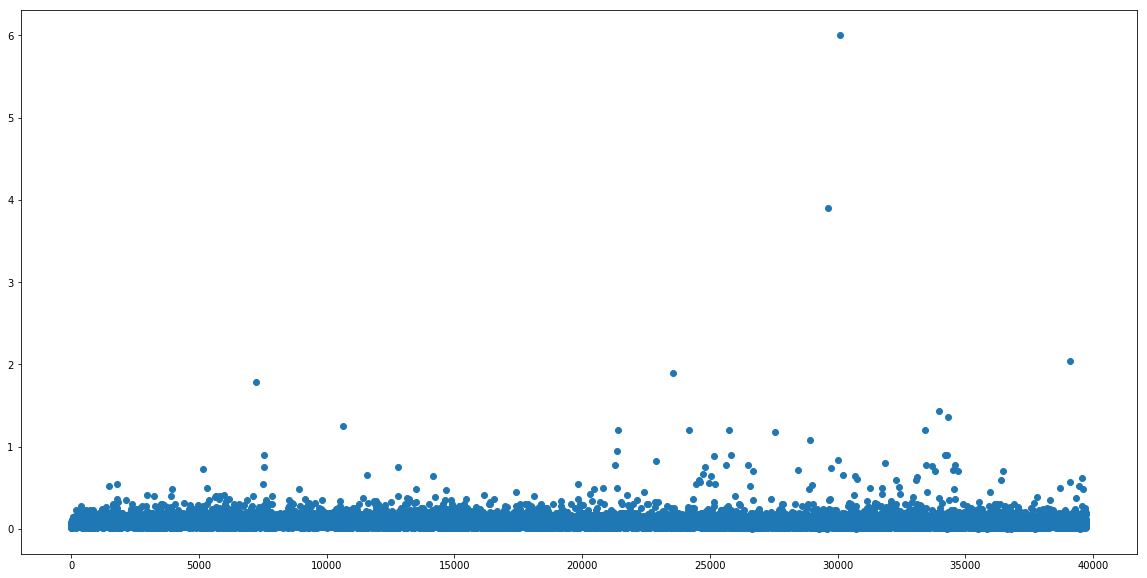

In [604]:
plt.figure(figsize=(20, 10))
# sns.regplot(x='annual_inc', data=loan_df)
# plt.yscale('log')
# plt.show()
plt.scatter(x=loan_df.index, y='annual_inc',data=loan_df)
plt.show()

In [605]:
loan_df.loc[loan_df['annual_inc']==loan_df['annual_inc'].max()].emp_title

30107    post office
Name: emp_title, dtype: object

In [606]:
len(loan_df.addr_state.unique())

50

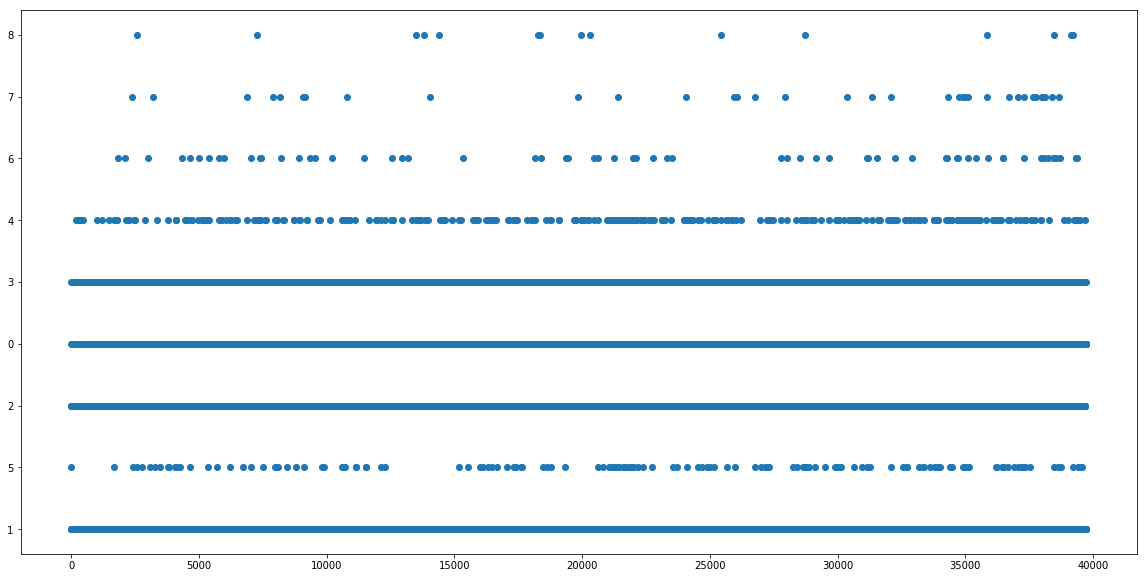

In [607]:
# pd.DataFrame(loan_df.groupby(['purpose','id'])['inq_last_6mths'].count())
plt.figure(figsize=(20, 10))
# sns.regplot(x='annual_inc', data=loan_df)
# plt.yscale('log')
# plt.show()
plt.scatter(x=loan_df.index, y='inq_last_6mths',data=loan_df)
plt.show()

## genral analysis

In [1159]:
# loan_df.inq_last_12m
# loan_df.earliest_cr_line_in_year
loan_df[['inq_last_6mths','earliest_cr_line_in_year','revol_util','pub_rec','pub_rec_bankruptcies']].corr()

,inq_last_6mths,earliest_cr_line_in_year,revol_util,pub_rec,pub_rec_bankruptcies
inq_last_6mths,1.000000,-0.011795,-0.068408,0.024802,0.015652
earliest_cr_line_in_year,-0.011795,1.000000,0.036647,-0.035385,-0.042938
revol_util,-0.068408,0.036647,1.000000,0.059071,0.061040
pub_rec,0.024802,-0.035385,0.059071,1.000000,0.843032
pub_rec_bankruptcies,0.015652,-0.042938,0.061040,0.843032,1.000000


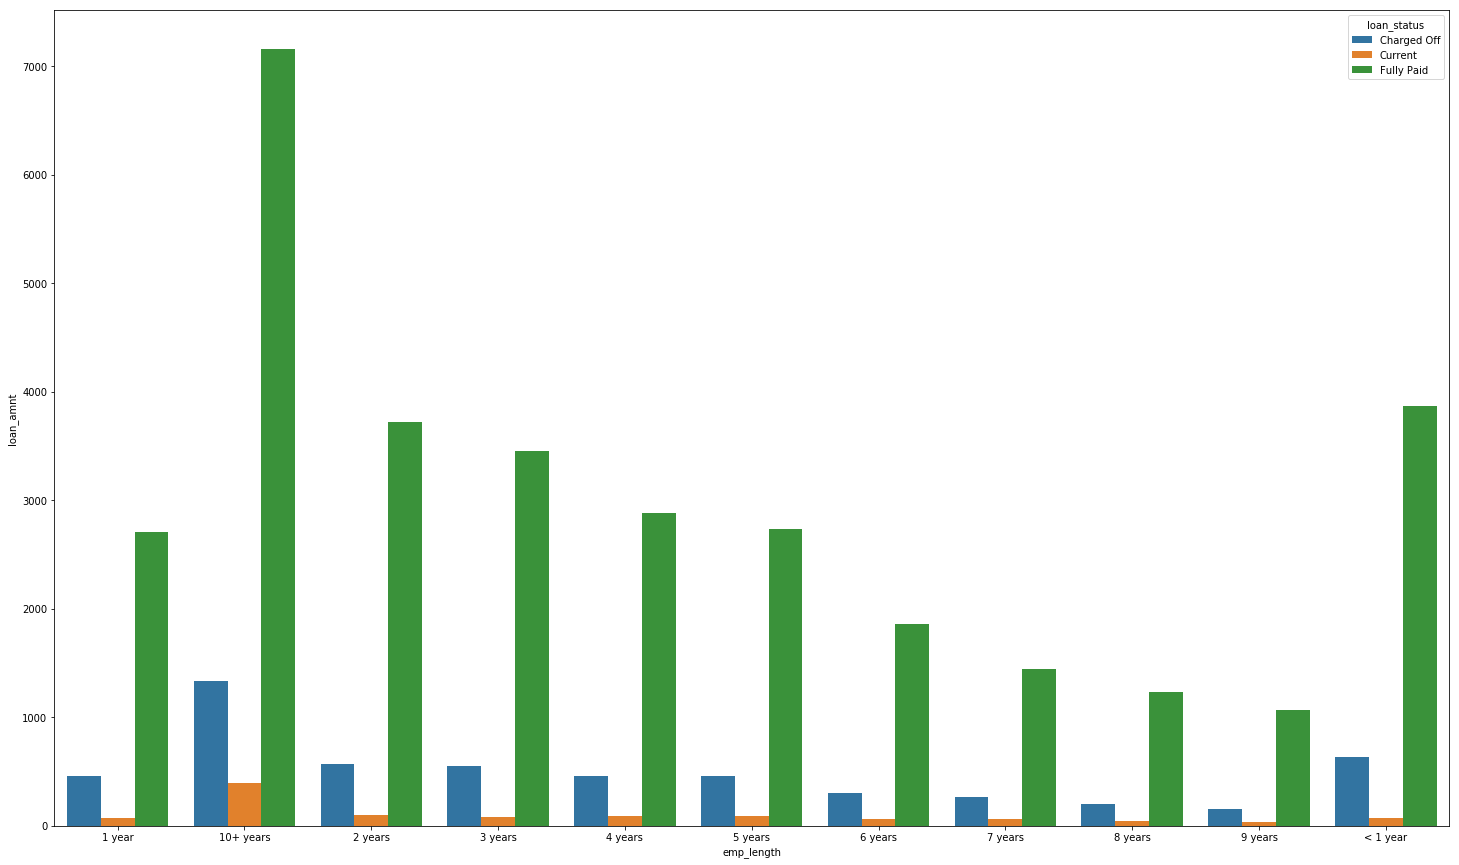

In [521]:
total_amt_per_emp_length = loan_df.groupby(['emp_length','loan_status'])['loan_amnt'].count()
total_amt_per_emp_length = total_amt_per_emp_length.reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status',data=total_amt_per_emp_length)
plt.show()

In [493]:
total_amt_per_state = pd.DataFrame(loan_df.groupby(['addr_state','loan_status'])['loan_amnt'].sum())
total_amt_per_state = total_amt_per_state.reset_index()

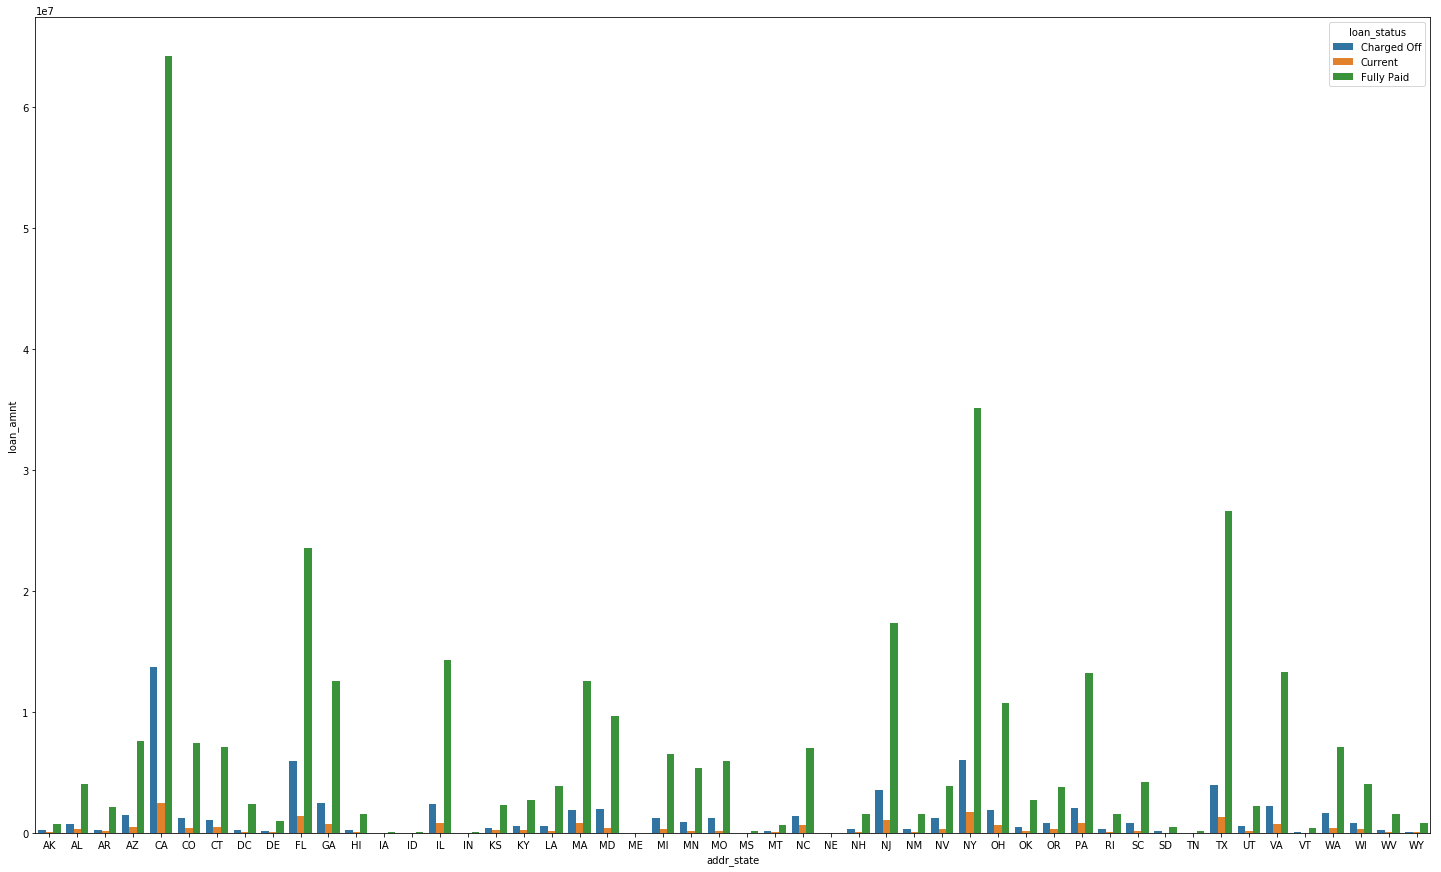

In [494]:
plt.figure(figsize=(25, 15))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=total_amt_per_state)
plt.show()